# Decision Tree and Random Forest Project

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

#### Get the data

In [2]:
loans = pd.read_csv('../datasets/loan_data.csv')

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## EDA
** Creating a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: This is pretty tricky, feel free to reference the solutions. You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

Text(0.5, 1.0, 'FICO')

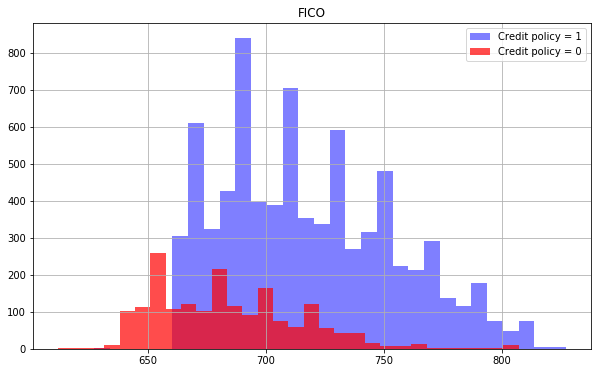

In [4]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,bins=30,color='blue',label='Credit policy = 1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.7,bins=30,color='red',label='Credit policy = 0')
plt.legend()
plt.title('FICO')

** Creating a similar figure, except this time select by the not.fully.paid column.**

Text(0.5, 1.0, 'FICO')

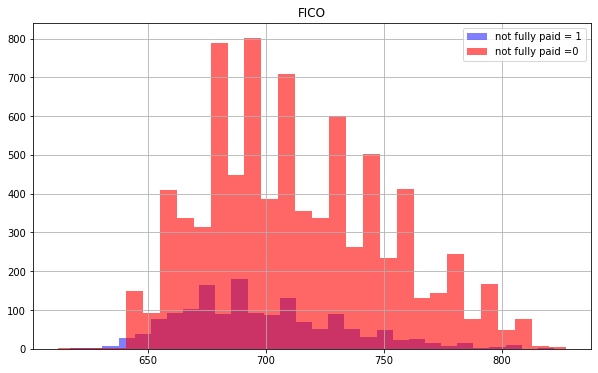

In [6]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha = 0.5,bins=30,label='not fully paid = 1',color='blue')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha = 0.6,bins=30,label='not fully paid =0',color='red')
plt.legend()
plt.title('FICO')


** Creating a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

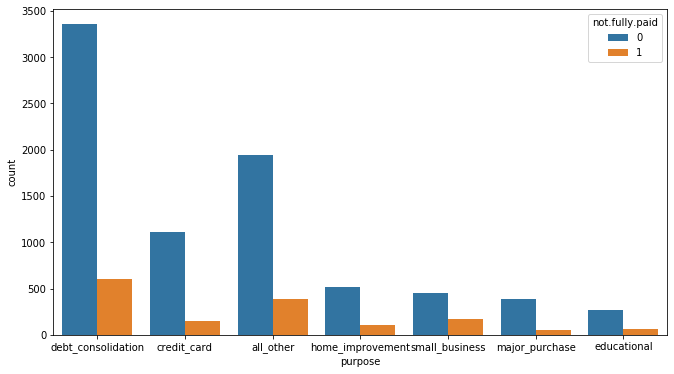

In [7]:
plt.figure(figsize=(11,6))
sns.countplot(data=loans,x=loans['purpose'],hue='not.fully.paid')

** Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

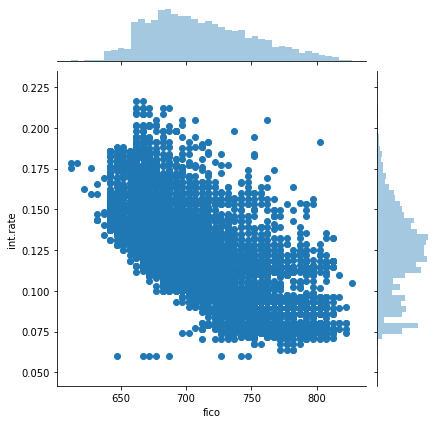

In [8]:
sns.jointplot(x='fico',y='int.rate',data=loans)

** Creating the following lmplots to see if the trend differed between not.fully.paid and credit.policy.**

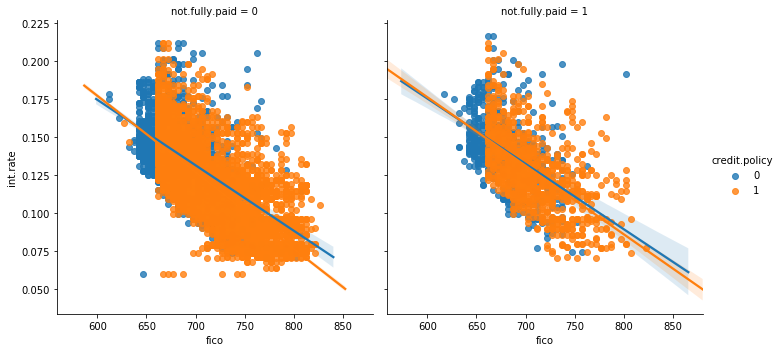

In [9]:
sns.lmplot(x='fico',y='int.rate',data=loans,col='not.fully.paid',hue='credit.policy')

## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

In [10]:
final_data = pd.get_dummies(loans,columns=['purpose'],drop_first=True)

In [11]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


#### Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

#### Testing Decision Tree Model

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dt = DecisionTreeClassifier()

In [16]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Prediction and Evaluation of Decision Tree Model

In [17]:
predict_dt = dt.predict(X_test)

In [18]:
print('For Decision Tree Model\n\n')
print('** Confusion Matrix **\n')
print(confusion_matrix(y_test,predict_dt))
print('\n\n** Classification Report **\n')
print(classification_report(y_test,predict_dt))

For Decision Tree Model


** Confusion Matrix **

[[2173  493]
 [ 376  119]]


** Classification Report **

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2666
           1       0.19      0.24      0.21       495

    accuracy                           0.73      3161
   macro avg       0.52      0.53      0.52      3161
weighted avg       0.75      0.73      0.74      3161



#### Training Random Forest Model

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf = RandomForestClassifier(n_estimators=300)

In [21]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Prediction and Evaluation of Random Forest Model

In [22]:
predict_rf = rf.predict(X_test)

In [23]:
print('For Random Forest Model\n\n')
print('** Confusion Matrix **\n')
print(confusion_matrix(y_test,predict_rf))
print('\n\n** Classification Report **\n')
print(classification_report(y_test,predict_rf))

For Random Forest Model


** Confusion Matrix **

[[2652   14]
 [ 486    9]]


** Classification Report **

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2666
           1       0.39      0.02      0.03       495

    accuracy                           0.84      3161
   macro avg       0.62      0.51      0.47      3161
weighted avg       0.77      0.84      0.78      3161



**What performed better the random forest or the decision tree?**

#### Ans:  
## Depends what metric you are trying to optimize for. 
## Notice the recall for each class for the models.
## Neither did very well, more feature engineering is needed.